In [1]:
from pymatgen.io.espresso.PWscf import PWxml, PWin, Projwfc
from pymatgen.io.vasp.outputs import Vasprun, Kpoints
from pymatgen.electronic_structure.core import Spin
from pymatgen.electronic_structure.plotter import BSPlotter
import xml.etree.ElementTree as ET
from monty.io import zopen
import xmltodict
import numpy as np

# Sr3PbO 
noncolinear+SOC band structure

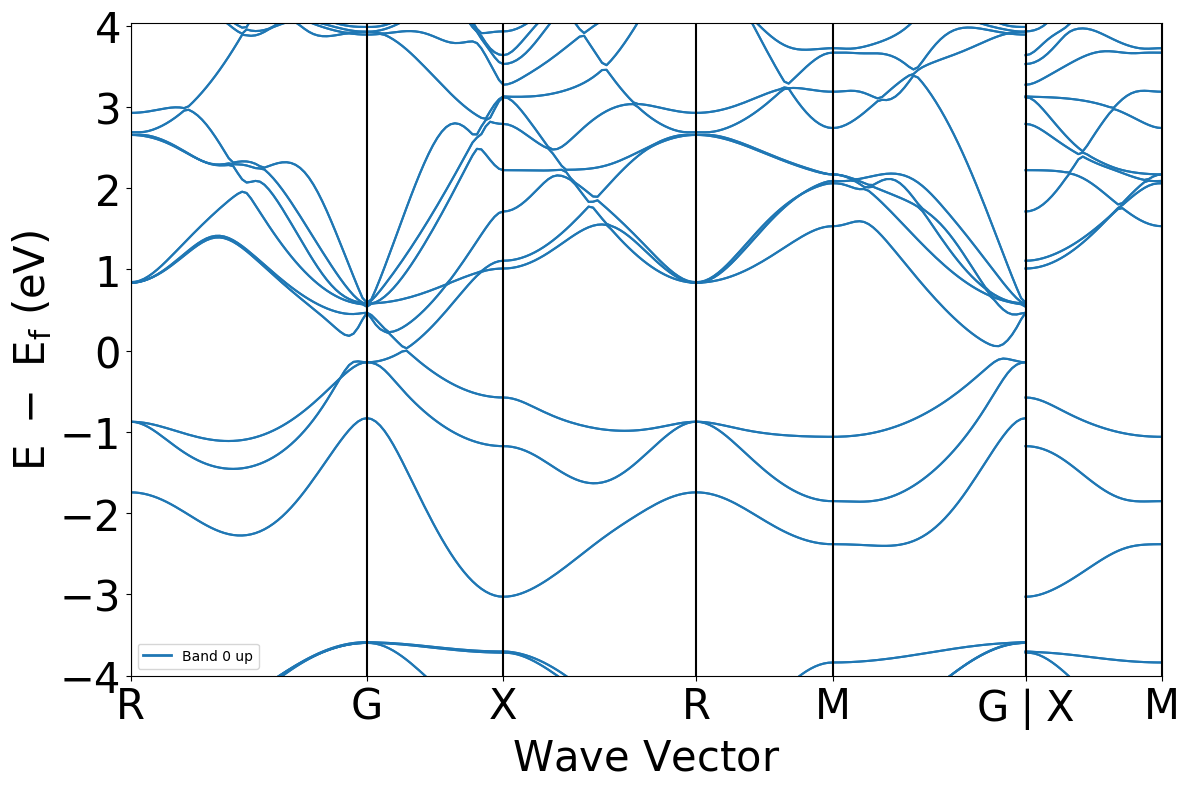

In [2]:
dir = 'Sr3PbO'
xml_filename = f'pymatgen/io/espresso/tests/data/{dir}/bands.xml'
in_filename = f'pymatgen/io/espresso/tests/data/{dir}/bands.in'
pwxml = PWxml(xml_filename)
pwin = PWin.from_file(in_filename)
#print(pwin.to_str())

bs = pwxml.get_band_structure()
BSPlotter(bs).show()

In [3]:
debug = pwxml._debug

# Si
colinear band structure, but ibrav != 0 with kpoints in crystal_b
This causes the same issue as the Ni calculation with pwxml.actual_kpoints being different from those in the actual input file


scf.xml has as many bands as electrons/2, which should trigger a warning since such cases break BSPlotter()

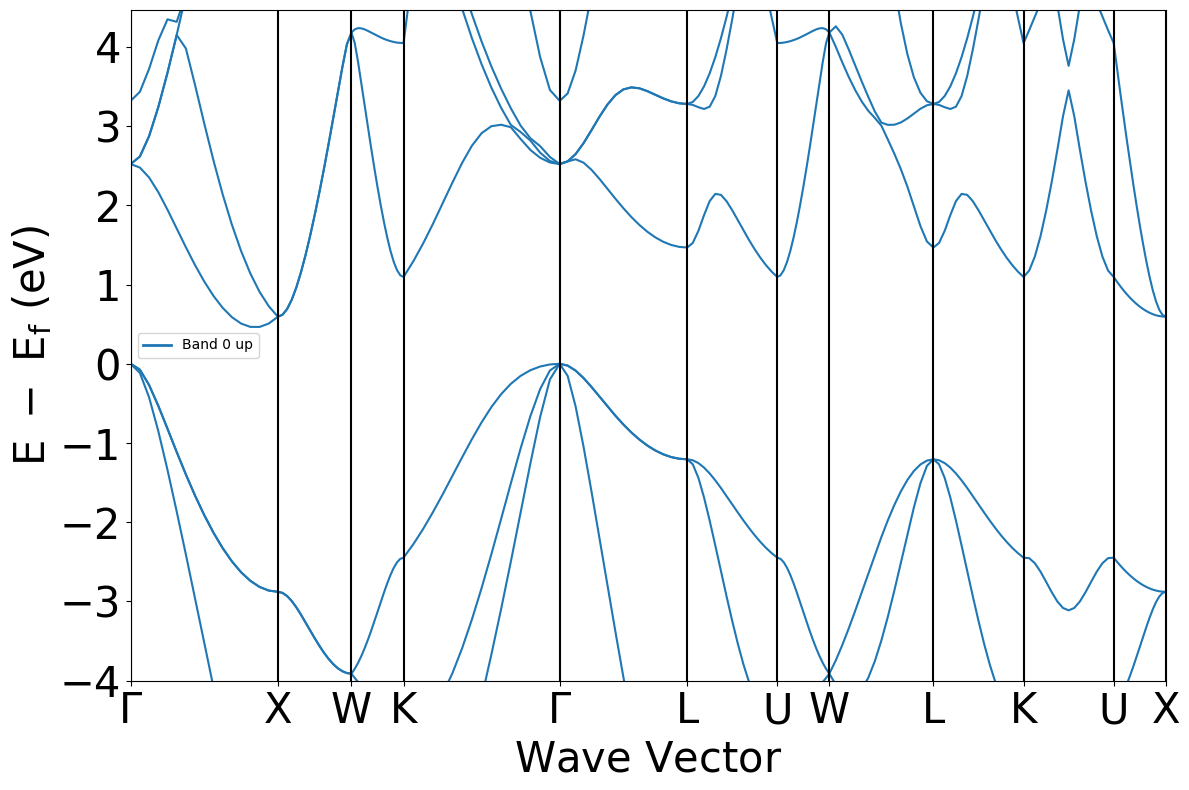

In [4]:
dir = 'Si'
xml_filename = f'pymatgen/io/espresso/tests/data/{dir}/bands.xml'
in_filename = f'pymatgen/io/espresso/tests/data/{dir}/bands.in'
pwxml = PWxml(xml_filename)
pwin = PWin.from_file(in_filename)
#print(pwin.to_str())

bs = pwxml.get_band_structure(kpoints_filename=in_filename)
BSPlotter(bs).show()

#pwxml.actual_kpoints

# Al
collinear bands with ibrav != 0 and tpiba cartesian k points with no option for the K_POINTS card (i.e., need to parse default)

the ibrav = 2 seems to cause issues with the actual kpoints computed are different from those in the K_POINTS card (symm. equiv)

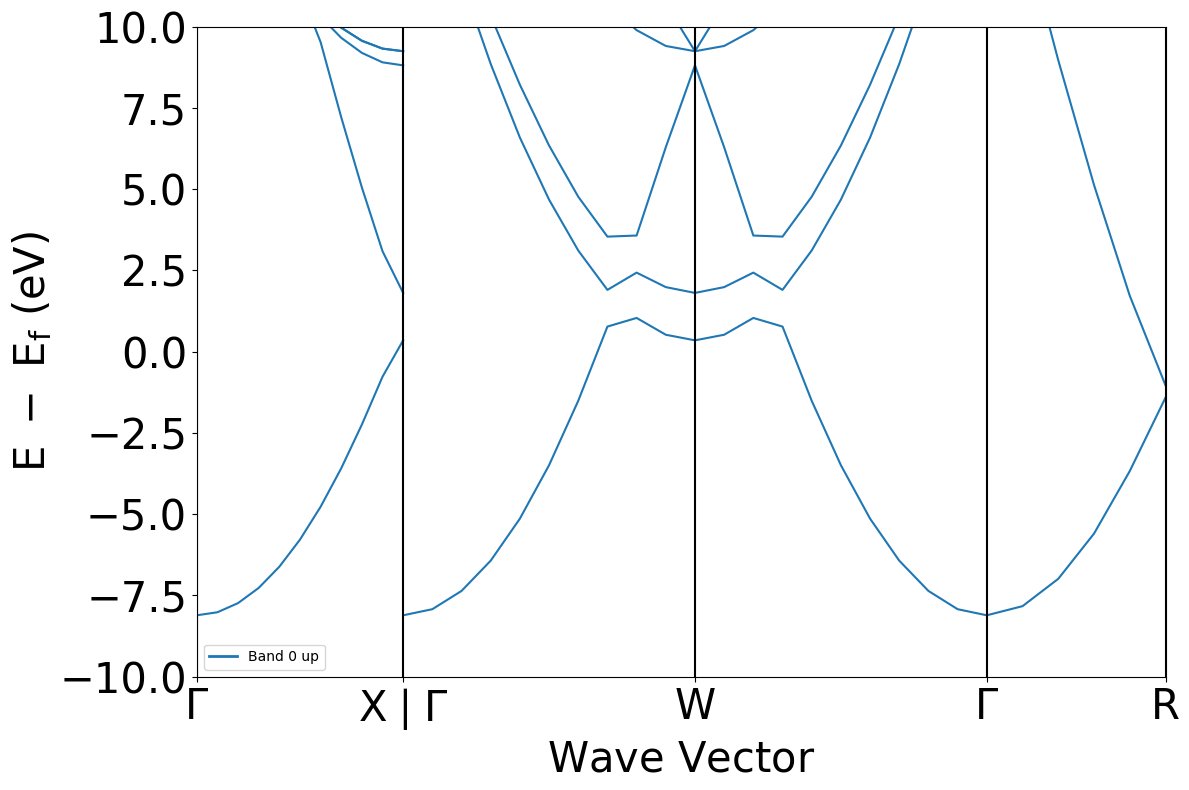

In [5]:
dir = 'Al'
xml_filename = f'pymatgen/io/espresso/tests/data/{dir}/bands.xml'
in_filename = f'pymatgen/io/espresso/tests/data/{dir}/bands.in'
pwxml = PWxml(xml_filename)
pwin = PWin.from_file(in_filename)
#print(pwin.to_str())

bs = pwxml.get_band_structure(kpoints_filename=in_filename)
BSPlotter(bs).show()

# Ni
collinear, spin-polarized bands, with ibrav = 2

the ibrav = 2 seems to cause issues with the actual kpoints computed are different from those in the K_POINTS card (symm. equiv)

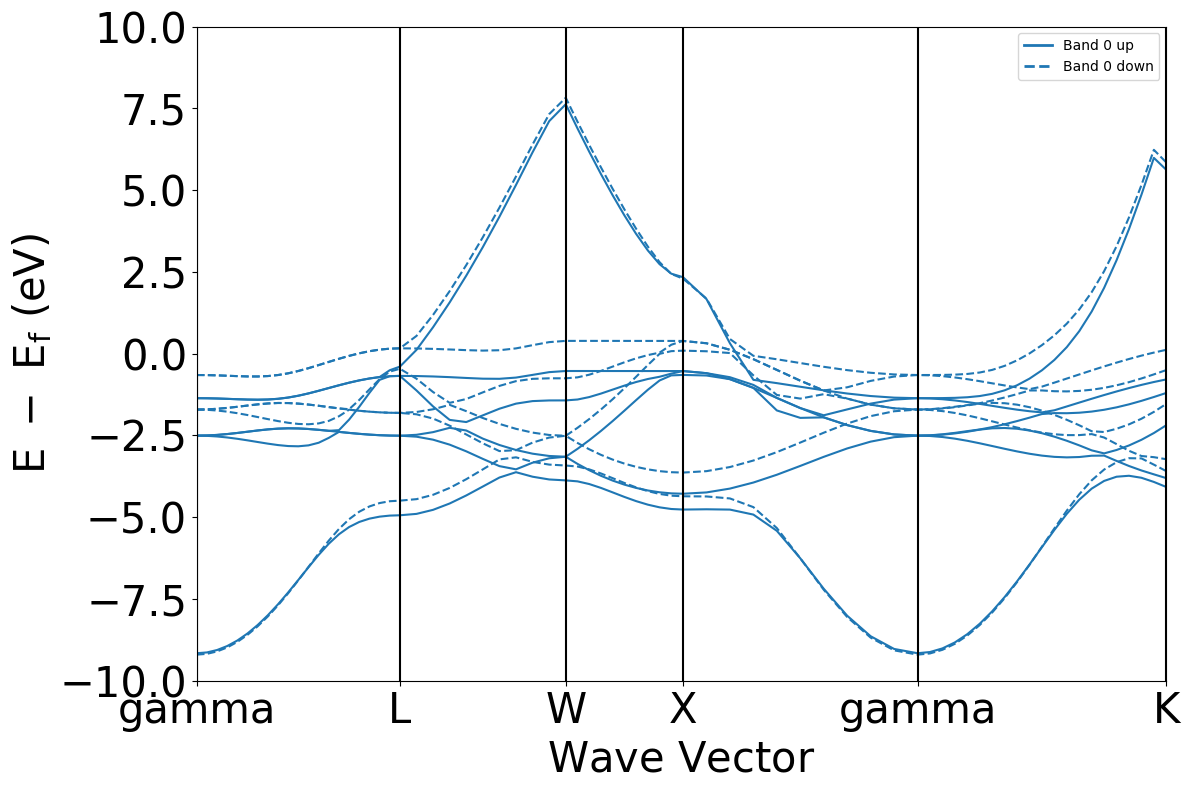

In [6]:
dir = 'Ni'
xml_filename = f'pymatgen/io/espresso/tests/data/{dir}/bands.xml'
in_filename = f'pymatgen/io/espresso/tests/data/{dir}/bands.in'
pwxml = PWxml(xml_filename)
pwin = PWin.from_file(in_filename)
#print(pwin.to_str())

bs = pwxml.get_band_structure()
BSPlotter(bs).show()

# FeO
collinear, spin-polarized scf, with DFT+U

In [7]:
dir = 'FeO'
xml_filename = f'pymatgen/io/espresso/tests/data/{dir}/scf.xml'
pwxml = PWxml(xml_filename)
#print(pwin.to_str())

/Users/ashour/code/pymatgen-io-espresso/pymatgen/io/espresso/PWscf.py:1331: UserWarning: Species labels contain numbers, which is common in AFM structures. This may cause problems with pymatgen's automatic oxidation state determination.
  warnings.warn(


# MoS2
collinear scf, with vdW

In [8]:
dir = 'MoS2'
xml_filename = f'pymatgen/io/espresso/tests/data/{dir}/scf.xml'
pwxml = PWxml(xml_filename)
#print(pwin.to_str())

# Debugging

In [9]:
dir = 'Si'
calc = 'bands'
xml_filename = f'pymatgen/io/espresso/tests/data/{dir}/{calc}.xml'
with open(xml_filename, encoding="UTF-8") as xml:
    data = xmltodict.parse(xml.read())['qes:espresso']
#data['output']['band_structure']
data['output']['atomic_structure']

{'@nat': '2',
 '@alat': '1.026000000000e1',
 '@bravais_index': '2',
 'atomic_positions': {'atom': [{'@name': 'Si',
    '@index': '1',
    '#text': '0.000000000000000e0 0.000000000000000e0 0.000000000000000e0'},
   {'@name': 'Si',
    '@index': '2',
    '#text': '2.565000000000000e0 2.565000000000000e0 2.565000000000000e0'}]},
 'cell': {'a1': '-5.130000000000000e0 0.000000000000000e0 5.130000000000000e0',
  'a2': '0.000000000000000e0 5.130000000000000e0 5.130000000000000e0',
  'a3': '-5.130000000000000e0 5.130000000000000e0 0.000000000000000e0'}}

In [10]:
vasprun_filename = f'pymatgen/io/espresso/tests/data/Si/vasprun_bands.xml'
vasprun_frac = Vasprun(vasprun_filename)#, parse_projected_eigen=True)
kpoints_filename = f'pymatgen/io/espresso/tests/data/Si/KPOINTS_bands'
#KP = Kpoints.from_file(kpoints_filename)
#bs = vasprun.get_band_structure(kpoints_filename=kpoints_filename)
#from pymatgen.electronic_structure.plotter import BSPlotter
#BSPlotter(bs).show()
bs_frac = vasprun_frac.get_band_structure(kpoints_filename=kpoints_filename)
alat = vasprun_frac.final_structure.lattice.a
[k.cart_coords*alat/2/np.pi for k in bs.kpoints[::16]]
#vasprun.actual_kpoints

/Users/ashour/venvs/pmg-espresso-dev/lib/python3.11/site-packages/pymatgen/io/vasp/outputs.py:1098: UserWarning: No POTCAR file with matching TITEL fields was found in /Users/ashour/code/pymatgen-io-espresso/pymatgen/io/espresso/tests/data/Si
  warnings.warn(f"No POTCAR file with matching TITEL fields was found in {os.path.abspath(p)}")


[array([0., 0., 0.]),
 array([-0.44219674,  0.44219674,  0.44219674]),
 array([-1.10549186e+00,  5.52745928e-01, -2.69925448e-16]),
 array([-5.52745928e-01, -1.22734251e-16, -1.47041354e-17]),
 array([-4.14559446e-01,  4.14559446e-01, -6.62435305e-17])]

In [11]:
#projwfc = Projwfc.from_file('pymatgen/io/espresso/tests/data/Sr3PbO/bands.proj')
#projwfc = Projwfc.from_file('pymatgen/io/espresso/tests/data/Si/Si.projwfc_up')
#projwfc = Projwfc.from_file('pymatgen/io/espresso/tests/data/Bi2Te3/Bi2Te3.projwfc_up')
projwfc = Projwfc.from_file('pymatgen/io/espresso/tests/data/Ni/bands.projwfc_down')
#pwxml = PWxml('pymatgen/io/espresso/tests/data/Si/scf.xml')
#pwxml.final_structure


/Users/ashour/code/pymatgen-io-espresso/pymatgen/io/espresso/utils.py:56: UserWarning: ibrav != 0 has not been thoroughly tested. Please be careful.
  warnings.warn("ibrav != 0 has not been thoroughly tested. Please be careful.")


In [12]:
projwfc

Colinear (spin-down) calculation with 71 k-points and 10 bands.

------------ Structure ------------
Full Formula (Ni1)
Reduced Formula: Ni
abc   :   2.487581   2.487581   2.487581
angles:  60.000000  60.000000  60.000000
pbc   :       True       True       True
Sites (1)
  #  SP      a    b    c    Z val.
---  ----  ---  ---  ---  --------
  1  Ni      0    0    0        18

---------- Atomic States ----------
  State #  SP (#)    Orbital      l    m
---------  --------  ---------  ---  ---
        1  Ni (1)    3s           0    1
        2  Ni (1)    3pz          1    1
        3  Ni (1)    3px          1    2
        4  Ni (1)    3py          1    3
        5  Ni (1)    3dz2         2    1
        6  Ni (1)    3dxz         2    2
        7  Ni (1)    3dyz         2    3
        8  Ni (1)    3dx2         2    4
        9  Ni (1)    3dxy         2    5
       10  Ni (1)    4s           0    1
       11  Ni (1)    4pz          1    1
       12  Ni (1)    4px          1    2
       13  

In [13]:
pwxml = PWxml('pymatgen/io/espresso/tests/data/Ni/bands.xml')

In [14]:
pwxml.eigenvalues[Spin.up].shape

(71, 10, 2)